In [ ]:
# from psfsynth import *
# inst = 1
# ifield = 4-8
# filt_order = 3 (inst=1), 5(inst=2)
# run_psf_synth(inst,ifield, filt_order=filt_order)
# profdat = run_psf_combine(inst, ifield)

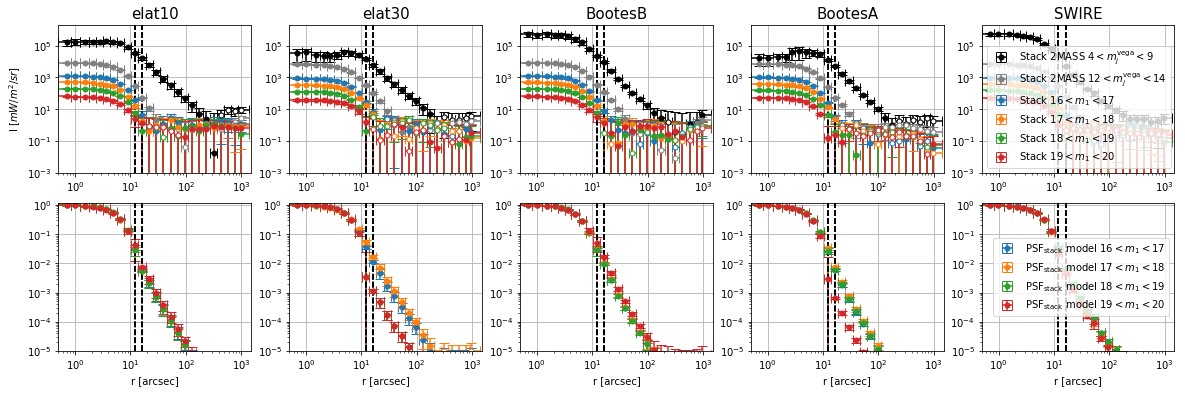

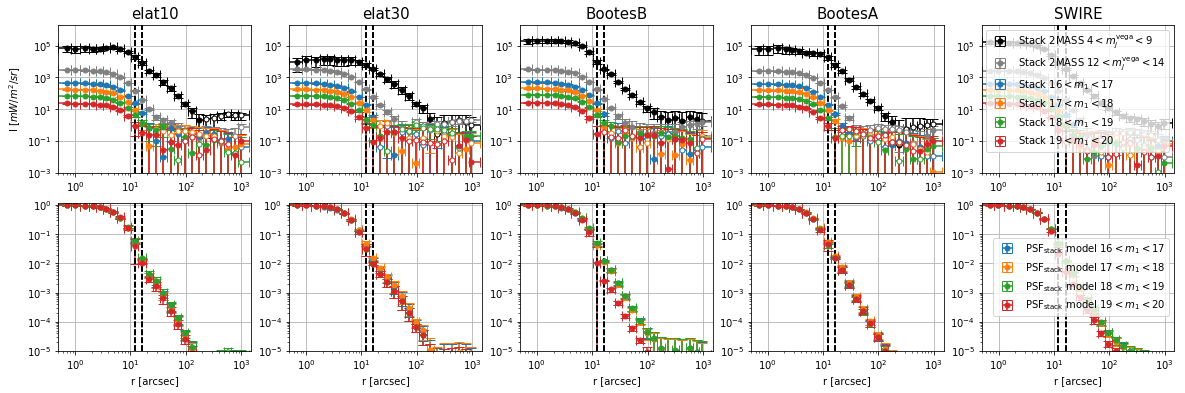

In [106]:
from psfstack import *

for inst in [1,2]:
    fig, ax = plt.subplots(2, 5, figsize = (20,6))
    for i,ifield in enumerate([4,5,6,7,8]):
        fname = mypaths['alldat'] + 'TM'+ str(inst) + \
        '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
        with open(fname, "rb") as f:
            profdat = pickle.load(f)

        plot_err_log(profdat['rbins'], 
                     profdat['out']['profcb'],
                     profdat['out']['profcb_err'],
                     ax=ax[0][i], color='k',label=r'Stack 2MASS $4 < m_j^{\rm vega} < 9$')

        plot_err_log(profdat['rbins'], 
                     profdat['mid']['profcb'],
                     profdat['mid']['profcb_err'],
                     ax=ax[0][i], color='grey',label=r'Stack 2MASS $12 < m_j^{\rm vega} < 14$')


        for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
            plot_err_log(profdat['rbins'], 
                         profdat[im]['profcb'],
                         profdat[im]['profcb_err'],
                         ax=ax[0][i], color='C'+str(im),label=r'Stack $%d < m_1 <%d$'%(m_min, m_max))
            plot_err_log(profdat['rbins'], 
                         profdat[im]['comb']['profcb'],
                         profdat[im]['comb']['profcb_err'],
                         ax=ax[1][i], color='C'+str(im),
                         label=r'PSF$_{\rm stack}$ model $%d < m_1 <%d$'%(m_min, m_max))

            ax[0][i].axvline(profdat['rbins'][9],c='k',ls='--')
            ax[0][i].axvline(profdat['rbins'][10],c='k',ls='--')
            ax[1][i].axvline(profdat['rbins'][9],c='k',ls='--')
            ax[1][i].axvline(profdat['rbins'][10],c='k',ls='--')

        ax[0][i].set_ylim([1e-3,2e6])
        ax[0][i].set_xlim([5e-1,1.5e3])
        ax[0][i].grid()    
        ax[0][i].set_title(fieldnamedict[ifield], fontsize=15)
        ax[1][i].set_ylim([1e-5,1.2])
        ax[1][i].set_xlim([5e-1,1.5e3])
        ax[1][i].grid() 
        ax[-1][i].set_xlabel('r [arcsec]')
    ax[0][-1].legend()
    ax[1][-1].legend()
    ax[0][0].set_ylabel('I [$mW/m^2/sr$]')

### TM1 elat30 19 < m < 20 stacking

it's not consistent with other mag bins, so use 18 < m <19 bin for this one 

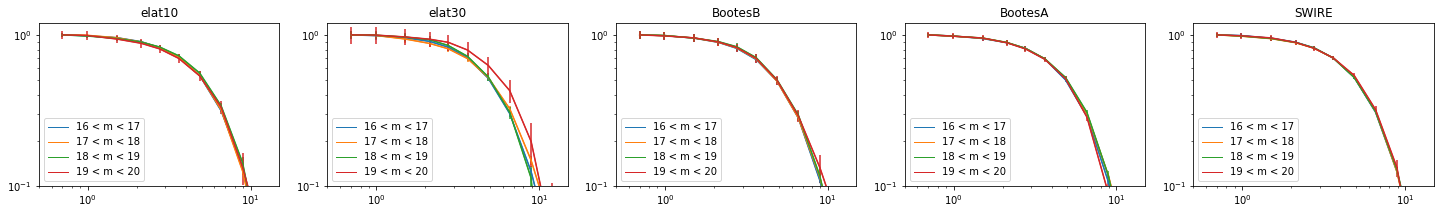

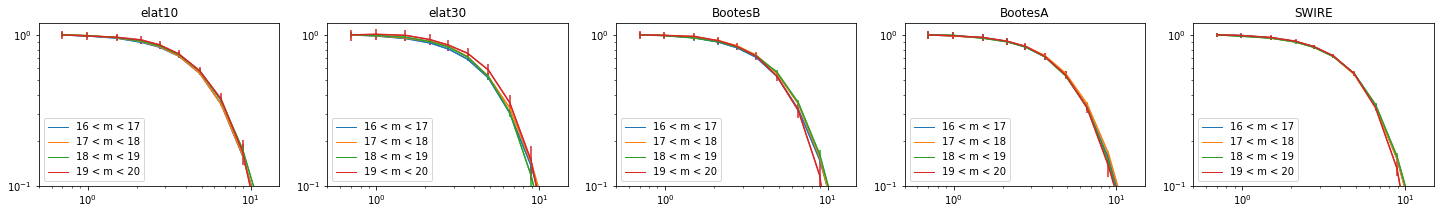

In [105]:
from psfsynth import *
for inst in [1,2]:
    fig, ax = plt.subplots(1, 5, figsize = (25,3))
    for i,ifield in enumerate([4,5,6,7,8]):
        fname = mypaths['alldat'] + 'TM'+ str(inst) + \
        '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
        with open(fname, "rb") as f:
            psfdat = pickle.load(f)

        for im in range(4):
            m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
            ax[i].loglog(psfdat['rbins'], psfdat[im]['profcb']/psfdat[im]['profcb'][0],
                       'C'+str(im), lw=1, label='%d < m < %d'%(m_min, m_max))
            ax[i].errorbar(psfdat['rbins'], psfdat[im]['profcb']/psfdat[im]['profcb'][0],
                         psfdat[im]['profcb_err']/psfdat[im]['profcb'][0], c='C'+str(im))
        ax[i].set_ylim([1e-1,1.2])
        ax[i].set_xlim([5e-1,15])
        ax[i].set_title(fieldnamedict[ifield])
        ax[i].legend()

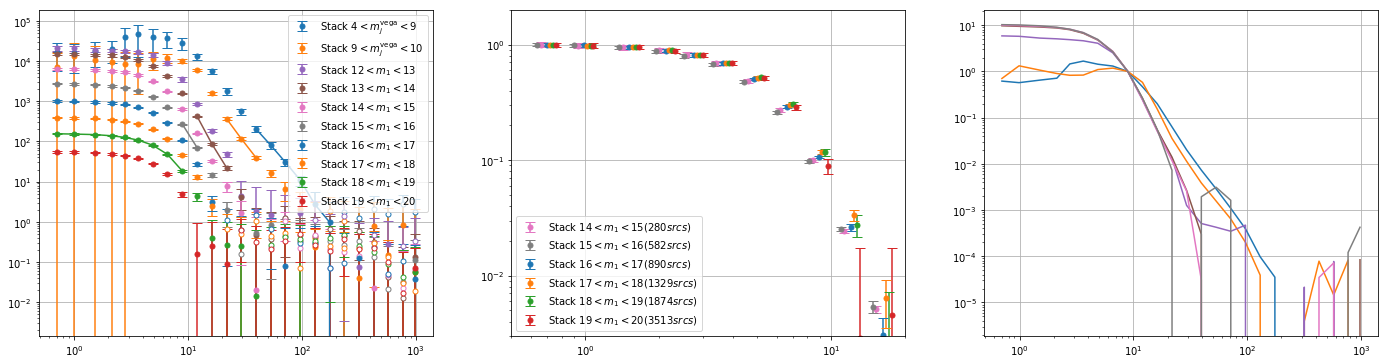

In [95]:
from psfsynth import *


inst = 1
ifield = 7

profc = np.zeros(25)
fig, ax = plt.subplots(1, 3, figsize = (24,6))    

for im,(m_min, m_max) in enumerate(zip([4,9], [9,10])):
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_2m_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    plot_err_log(profdat['rbins'], 
                 profdat['profcb'],
                 profdat['profcb_err'], plot_xerr=False,
                 ax=ax[0], color='C'+str(im), label=r'Stack $%d < m_j^{\rm vega} <%d$'%(m_min, m_max))
    
    ax[2].loglog(profdat['rbins'], profdat['profcb']/profdat['profcb'][8],
                 color='C'+str(im), label=r'Stack $%d < m_j^{\rm vega} <%d$'%(m_min, m_max))
    if m_min==4:
        ax[0].plot(profdat['rbins'][13:], profdat['profcb'][13:],color='C'+str(im))
        profc[13:] = profdat['profcb'][13:]
    if m_min==9:
        ax[0].plot(profdat['rbins'][11:14], profdat['profcb'][11:14],color='C'+str(im))
        profc[11:14] = profdat['profcb'][11:14] / profdat['profcb'][13] * profc[13]
        
for im,(m_min, m_max) in enumerate(zip([12,13,14,15], [13,14,15,16])):
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_ps_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    plot_err_log(profdat['rbins'], 
                 profdat['profcb'],
                 profdat['profcb_err'], plot_xerr=False,
                 ax=ax[0], color='C'+str(im+4), label=r'Stack $%d < m_1 <%d$'%(m_min, m_max))
    if m_min in [14,15]:
        plot_err_log(profdat['rbins']*(1-im*0.03), 
                     profdat['profcb']/profdat['profcb'][0],
                     profdat['profcb_err']/profdat['profcb'][0],
                     ax=ax[1], color='C'+str(im+4), plot_xerr=False,
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat['Nsrc']))
    if m_min==13:
        ax[0].plot(profdat['rbins'][9:12], profdat['profcb'][9:12],color='C'+str(im+4))
        profc[9:12] = profdat['profcb'][9:12] / profdat['profcb'][11] * profc[11]
    if m_min==15:
        ax[0].plot(profdat['rbins'][8:10], profdat['profcb'][8:10],color='C'+str(im+4))
        profc[8:10] = profdat['profcb'][8:10] / profdat['profcb'][9] * profc[9]

    ax[2].loglog(profdat['rbins'], profdat['profcb']/profdat['profcb'][8],
                 color='C'+str(im+4), label=r'Stack $%d < m_1 <%d$'%(m_min, m_max))

fname = mypaths['alldat'] + 'TM'+ str(inst) + \
'/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
with open(fname, "rb") as f:
    profdat = pickle.load(f)
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    plot_err_log(profdat['rbins'], 
                 profdat[im]['profcb'],
                 profdat[im]['profcb_err'],plot_xerr=False,
                 ax=ax[0], color='C'+str(im),label=r'Stack $%d < m_1 <%d$'%(m_min, m_max))
    if m_min == 18:
        ax[0].plot(profdat['rbins'][0:9], profdat[im]['profcb'][0:9],color='C'+str(im))
        profc[0:9] = profdat[im]['profcb'][0:9] / profdat[im]['profcb'][8] * profc[8]
    plot_err_log(profdat['rbins']*(1+im*0.03), 
                 profdat[im]['profcb']/profdat[im]['profcb'][0],
                 profdat[im]['profcb_err']/profdat[im]['profcb'][0],
                 ax=ax[1], color='C'+str(im), plot_xerr=False,
                 label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat[im]['Nsrc']))

profc /= profc[0]

ax[0].legend()
ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_ylim([3e-3,2])
ax[1].set_xlim([5e-1,20])
ax[2].grid()
plt.savefig('/Users/ytcheng/Desktop/stack1.png', dpi = 100, bbox_inches='tight')

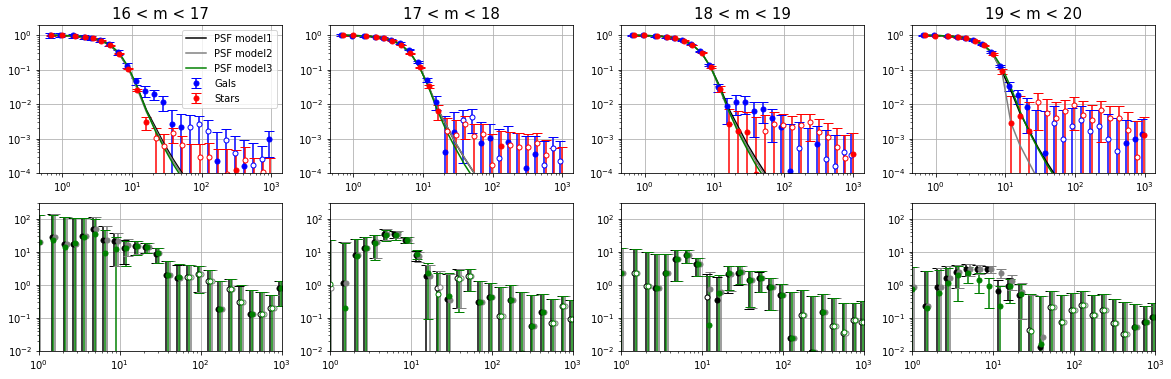

In [96]:
inst = 1
filt_order = filt_order_dict[inst]
ifield = 7

fig, ax = plt.subplots(2, 4, figsize = (20,8))
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                load_from_file=True, BGsub=False).stackdat

    plot_err_log(stackdat['rbins']*0.95, 
                 stackdat['profcb']/stackdat['profcb'][0],
                 np.sqrt(np.diag(stackdat['cov']['profcb']))/stackdat['profcb'][0],
                 ax=ax[0][im], color='b', plot_xerr=False,
                 label=r'Gals')

    profdat = run_psf_combine(inst, ifield, savedata=False, idx_comb=(8,10))
    plot_err_log(profdat['rbins'], 
                 profdat[im]['profcb']/profdat[im]['profcb'][0],
                 profdat[im]['profcb_err']/profdat[im]['profcb'][0],
                 ax=ax[0][im], plot_xerr=False, color='r',label=r'Stars')
        
    ax[0][im].loglog(profdat['rbins'], 
                  profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0],
                  'k', label='PSF model1')

    ex = stackdat['profcb'] \
    - profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0] * stackdat['profcb'][0] 
    ex_err = np.sqrt(np.diag(stackdat['cov']['profcb']))
    plot_err_log(profdat['rbins']*0.95, 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='k', label='PSF model1')

    profdat = run_psf_combine(inst, ifield, savedata=False, idx_comb=(9,10))
    ax[0][im].loglog(profdat['rbins'], 
                  profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0], 
                  'grey',label='PSF model2')

    ex = stackdat['profcb'] \
    - profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0] * stackdat['profcb'][0] 
    ex_err = np.sqrt(np.diag(stackdat['cov']['profcb']))
    plot_err_log(profdat['rbins']*1.05, 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='grey', label='PSF model2')
    
    ax[0][im].loglog(profdat['rbins'], profc,'g',label='PSF model3')
    ex = stackdat['profcb'] \
    - profc/profc[0] * stackdat['profcb'][0] 
    ex_err = np.sqrt(np.diag(stackdat['cov']['profcb']))
    plot_err_log(profdat['rbins'], 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='g', label='PSF model3')
    
    ax[0][im].set_ylim([1e-4, 2])
    ax[0][im].grid()
    ax[0][im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
    ax[1][im].set_ylim([1e-2,3e2])
    ax[1][im].set_xlim([1e0,1e3])
    ax[1][im].grid()
ax[0][0].legend()
plt.savefig('/Users/ytcheng/Desktop/excess1.png', dpi = 100, bbox_inches='tight')

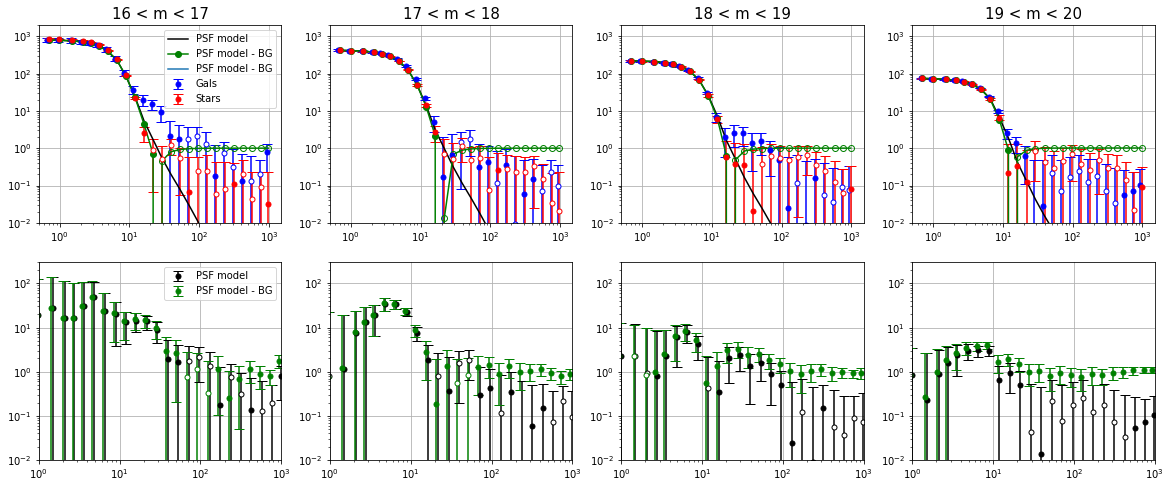

In [116]:
inst = 1
filt_order = filt_order_dict[inst]
ifield = 7

bg = 1
fig, ax = plt.subplots(2, 4, figsize = (20,8))
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                load_from_file=True, BGsub=False).stackdat

    plot_err_log(stackdat['rbins']*0.95, 
                 stackdat['profcb'],
                 np.sqrt(np.diag(stackdat['cov']['profcb'])),
                 ax=ax[0][im], color='b', plot_xerr=False,
                 label=r'Gals')

    norm = stackdat['profcb'][0] / profdat[im]['profcb'][0]
    profdat = run_psf_combine(inst, ifield, savedata=False, idx_comb=(8,10))
    plot_err_log(profdat['rbins'], 
                 profdat[im]['profcb'] * norm,
                 profdat[im]['profcb_err'] * norm,
                 ax=ax[0][im], plot_xerr=False, color='r',label=r'Stars')
        
    norm = stackdat['profcb'][0] / profdat[im]['comb']['profcb'][0]
    ax[0][im].loglog(profdat['rbins'], 
                  profdat[im]['comb']['profcb']* norm,
                  'k', label='PSF model')
    
    ex = stackdat['profcb'] \
    - profdat[im]['comb']['profcb'] * norm
    ex_err = np.sqrt(np.diag(stackdat['cov']['profcb']))
    plot_err_log(profdat['rbins'], 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='k', label='PSF model')

    
    prof1 = profdat[im]['comb']['profcb']* norm - bg
    prof1 = prof1 * stackdat['profcb'][0] / prof1[0]
    ax[0][im].loglog(profdat['rbins'], 
                  prof1, 'go-',
                  'g', label='PSF model - BG')
    ax[0][im].loglog(profdat['rbins'], 
                  -prof1, 'go-', 
                  fillstyle='none')
    
    ex = stackdat['profcb'] - prof1
    plot_err_log(profdat['rbins']*0.95, 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='g', label='PSF model - BG')


    ax[0][im].set_ylim([1e-2,2e3])
    ax[0][im].set_xlim([5e-1,1.5e3])
    ax[0][im].grid()
    ax[0][im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
    ax[1][im].set_ylim([1e-2,3e2])
    ax[1][im].set_xlim([1e0,1e3])
    ax[1][im].grid()
ax[0][0].legend()
ax[1][0].legend()

plt.savefig('/Users/ytcheng/Desktop/excess_bg_%s.png'%fieldnamedict[ifield],
            dpi = 100, bbox_inches='tight')

TypeError: run_psf_combine() got an unexpected keyword argument 'idx_comb'

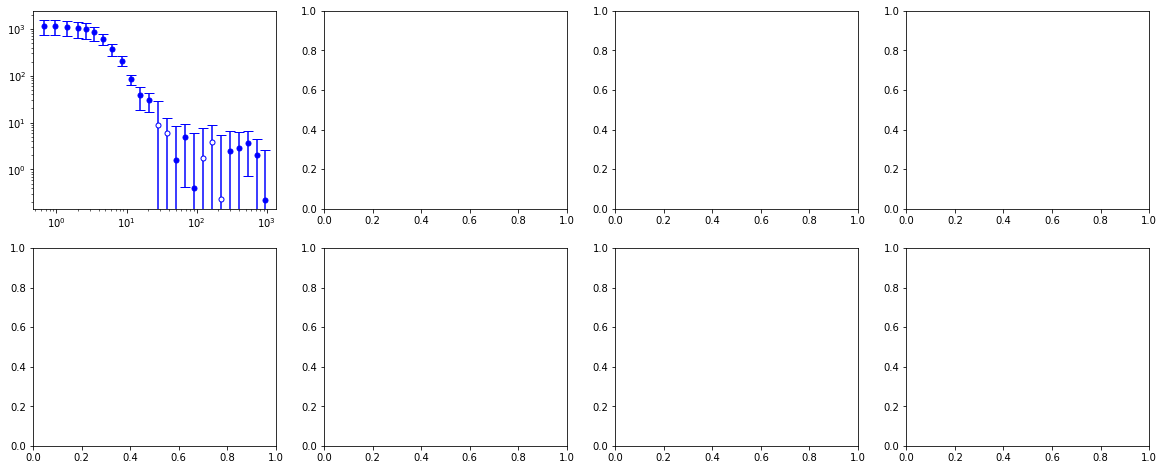

In [11]:
inst = 1
filt_order = filt_order_dict[inst]
ifield = 6

fig, ax = plt.subplots(2, 4, figsize = (20,8))
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                load_from_file=True, BGsub=False).stackdat

    plot_err_log(stackdat['rbins']*0.95, 
                 stackdat['profcb'],
                 np.sqrt(np.diag(stackdat['cov']['profcb'])),
                 ax=ax[0][im], color='b', plot_xerr=False,
                 label=r'Gals')

    norm = stackdat['profcb'][0] / profdat[im]['profcb'][0]
    profdat = run_psf_combine(inst, ifield, savedata=False, idx_comb=(8,10))
    plot_err_log(profdat['rbins'], 
                 profdat[im]['profcb'] * norm,
                 profdat[im]['profcb_err'] * norm,
                 ax=ax[0][im], plot_xerr=False, color='r',label=r'Stars')
        
    ex = stackdat['profcb'] - profdat[im]['profcb'] * norm
    ex_err = np.diag(np.sqrt(stackdat['cov']['profcb'] + \
                   profdat[im]['cov']*norm**2))
    plot_err_log(profdat['rbins'], 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='g', label='gal - star')

    profdat = run_psf_combine(inst, ifield, savedata=False, idx_comb=(8,10))
    norm = stackdat['profcb'][0] / profdat[im]['comb']['profcb'][0]
    ax[0][im].loglog(profdat['rbins'], 
                  profdat[im]['comb']['profcb']* norm,
                  'k', label='PSF model')
    ex = stackdat['profcb'] \
    - profdat[im]['comb']['profcb'] * norm
    ex_err = np.sqrt(np.diag(stackdat['cov']['profcb']))
    plot_err_log(profdat['rbins']*1.05, 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='k', label='gal - PSF model')

    ax[0][im].set_ylim([1e-2,2e3])
    ax[0][im].set_xlim([5e-1,1.5e3])
    ax[0][im].grid()
    ax[0][im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
    ax[1][im].set_ylim([1e-2,3e2])
    ax[1][im].set_xlim([1e0,1e3])
    ax[1][im].grid()
ax[0][0].legend()
ax[1][0].legend()

plt.savefig('/Users/ytcheng/Desktop/excess_g_s_%s.png'%fieldnamedict[ifield],
            dpi = 100, bbox_inches='tight')

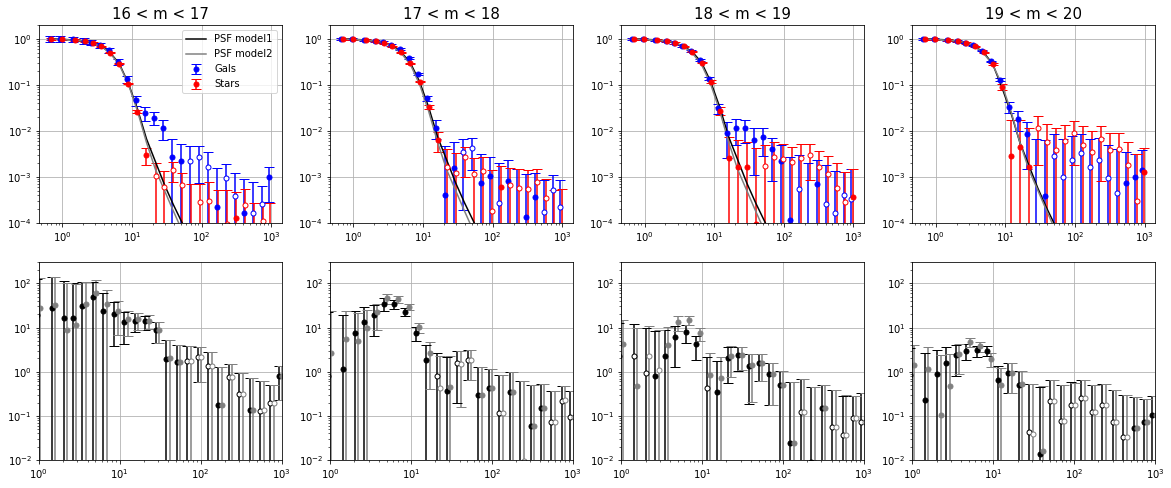

In [9]:
from psfsynth import *

inst = 1
filt_order = filt_order_dict[inst]
ifield = 7

fig, ax = plt.subplots(2, 4, figsize = (20,8))
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                load_from_file=True, BGsub=False).stackdat

    plot_err_log(stackdat['rbins']*0.95, 
                 stackdat['profcb']/stackdat['profcb'][0],
                 np.sqrt(np.diag(stackdat['cov']['profcb']))/stackdat['profcb'][0],
                 ax=ax[0][im], color='b', plot_xerr=False,
                 label=r'Gals')

    profdat = run_psf_combine_old(inst, ifield, savedata=False, idx_comb=(8,10))
    plot_err_log(profdat['rbins'], 
                 profdat[im]['profcb']/profdat[im]['profcb'][0],
                 profdat[im]['profcb_err']/profdat[im]['profcb'][0],
                 ax=ax[0][im], plot_xerr=False, color='r',label=r'Stars')
        
    ax[0][im].loglog(profdat['rbins'], 
                  profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0],
                  'k', label='PSF model1')

    ex = stackdat['profcb'] \
    - profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0] * stackdat['profcb'][0] 
    ex_err = np.sqrt(np.diag(stackdat['cov']['profcb']))
    plot_err_log(profdat['rbins']*0.95, 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='k', label='PSF model1')

    profdat = run_psf_combine(inst, ifield, savedata=False)
    ax[0][im].loglog(profdat['rbins'], 
                  profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0], 
                  'grey',label='PSF model2')

    ex = stackdat['profcb'] \
    - profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0] * stackdat['profcb'][0] 
    ex_err = np.sqrt(np.diag(stackdat['cov']['profcb']))
    plot_err_log(profdat['rbins']*1.05, 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='grey', label='PSF model2')
    
    ax[0][im].set_ylim([1e-4, 2])
    ax[0][im].grid()
    ax[0][im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
    ax[1][im].set_ylim([1e-2,3e2])
    ax[1][im].set_xlim([1e0,1e3])
    ax[1][im].grid()
ax[0][0].legend()
# plt.savefig('/Users/ytcheng/Desktop/excess1.png', dpi = 100, bbox_inches='tight')

In [4]:
from reduction import *
data_maps = {1: image_reduction(1), 2: image_reduction(2)}

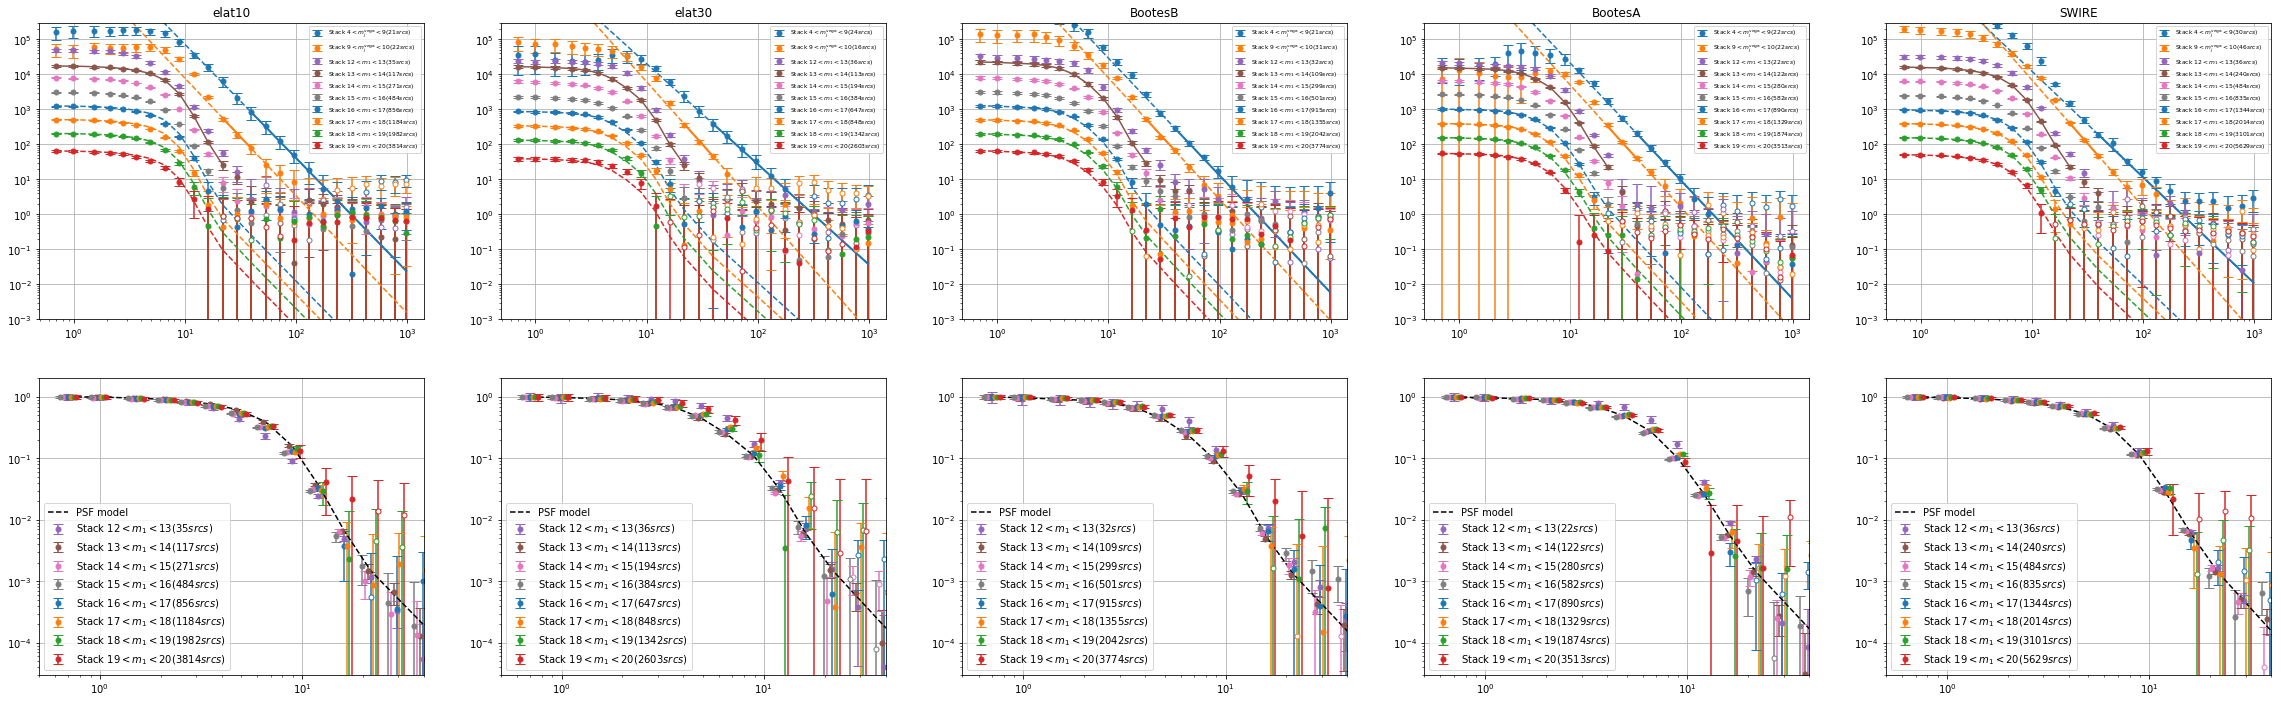

In [4]:
from psfsynth import *
# from reduction import *
# data_maps = {1: image_reduction(1), 2: image_reduction(2)}

psfmodel ={}
inst = 1
profc = np.zeros(25)
fig, ax = plt.subplots(2, 5, figsize = (40,12))
for i, ifield in enumerate([4,5,6,7,8]):
#     mean_ps = load_processed_images(data_maps, return_names=[(inst,ifield,'mean_ps')])
#     ax[0][i].axhline(mean_ps, c='k', ls='--', lw=3)
    for im,(m_min, m_max) in enumerate(zip([4,9], [9,10])):
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_2m_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat = pickle.load(f)
        plot_err_log(profdat['rbins'], 
                     profdat['profcb'],
                     profdat['profcb_err'], plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im),
                     label=r'Stack $%d < m_j^{\rm vega} <%d (%d srcs)$'%(m_min, m_max, profdat['Nsrc']))
        if m_min==4:
            slope_out = np.polyfit(np.log10(profdat['rbins'][11:17]),
                               np.log10(profdat['profcb'][11:17]),1)[0]
            proffit = 10 ** (slope_out * np.log10(profdat['rbins']))
            proffit = proffit/proffit[13]*profdat['profcb'][13]
            ax[0][i].plot(profdat['rbins'], proffit, color='C'+str(im), ls='--')
            ax[0][i].plot(profdat['rbins'][13:], proffit[13:], color='C'+str(im), lw=2)
            profc[13:] = proffit[13:]
        if m_min == 9:
            slope_mid = np.polyfit(np.log10(profdat['rbins'][11:15]),
                               np.log10(profdat['profcb'][11:15]),1)[0]
            proffit = 10 ** (slope_mid * np.log10(profdat['rbins']))
            proffit = proffit/proffit[13]*profdat['profcb'][13]
            ax[0][i].plot(profdat['rbins'], proffit, color='C'+str(im), ls='--')
            ax[0][i].plot(profdat['rbins'][11:14], proffit[11:14], color='C'+str(im), lw=2)
            profc[11:14] = proffit[11:14] / proffit[13] * profc[13]
            
    for im,(m_min, m_max) in enumerate(zip([12,13,14,15], [13,14,15,16])):
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_ps_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat = pickle.load(f)
        plot_err_log(profdat['rbins'], 
                     profdat['profcb'],
                     profdat['profcb_err'], plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im+4), 
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max, profdat['Nsrc']))
        plot_err_log(profdat['rbins']*(1-im*0.03), 
                     profdat['profcb']/profdat['profcb'][0],
                     profdat['profcb_err']/profdat['profcb'][0],
                     ax=ax[1][i], color='C'+str(im+4), plot_xerr=False,
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat['Nsrc']))
        if m_min==13:
            ax[0][i].plot(profdat['rbins'][:12], profdat['profcb'][:12], color='C'+str(im+4))
            profc[:12] = profdat['profcb'][:12] / profdat['profcb'][11] * profc[11]
            
    profc /= profc[0]
    psfmodel[ifield] = profc
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) + \
    '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        plot_err_log(profdat['rbins'], 
                     profdat[im]['profcb'],
                     profdat[im]['profcb_err'],plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im),
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max, profdat[im]['Nsrc']))
        plot_err_log(profdat['rbins']*(1+im*0.03), 
                     profdat[im]['profcb']/profdat[im]['profcb'][0],
                     profdat[im]['profcb_err']/profdat[im]['profcb'][0],
                     ax=ax[1][i], color='C'+str(im), plot_xerr=False,
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat[im]['Nsrc']))
        
        ax[0][i].loglog(profdat['rbins'], profc*profdat[im]['profcb'][0],color='C'+str(im),ls='--')
    ax[1][i].loglog(profdat['rbins'], profc,color='k',ls='--', label='PSF model')
        
    ax[0][i].set_title(fieldnamedict[ifield])
    ax[0][i].legend(fontsize=6)
    ax[0][i].set_ylim([1e-3,3e5])
    ax[1][i].legend()
    ax[0][i].grid()
    ax[1][i].grid()
    ax[1][i].set_ylim([3e-5,2])
    ax[1][i].set_xlim([5e-1,40])
#     plt.savefig('/Users/ytcheng/Desktop/star_stack.png', dpi = 100, bbox_inches='tight')

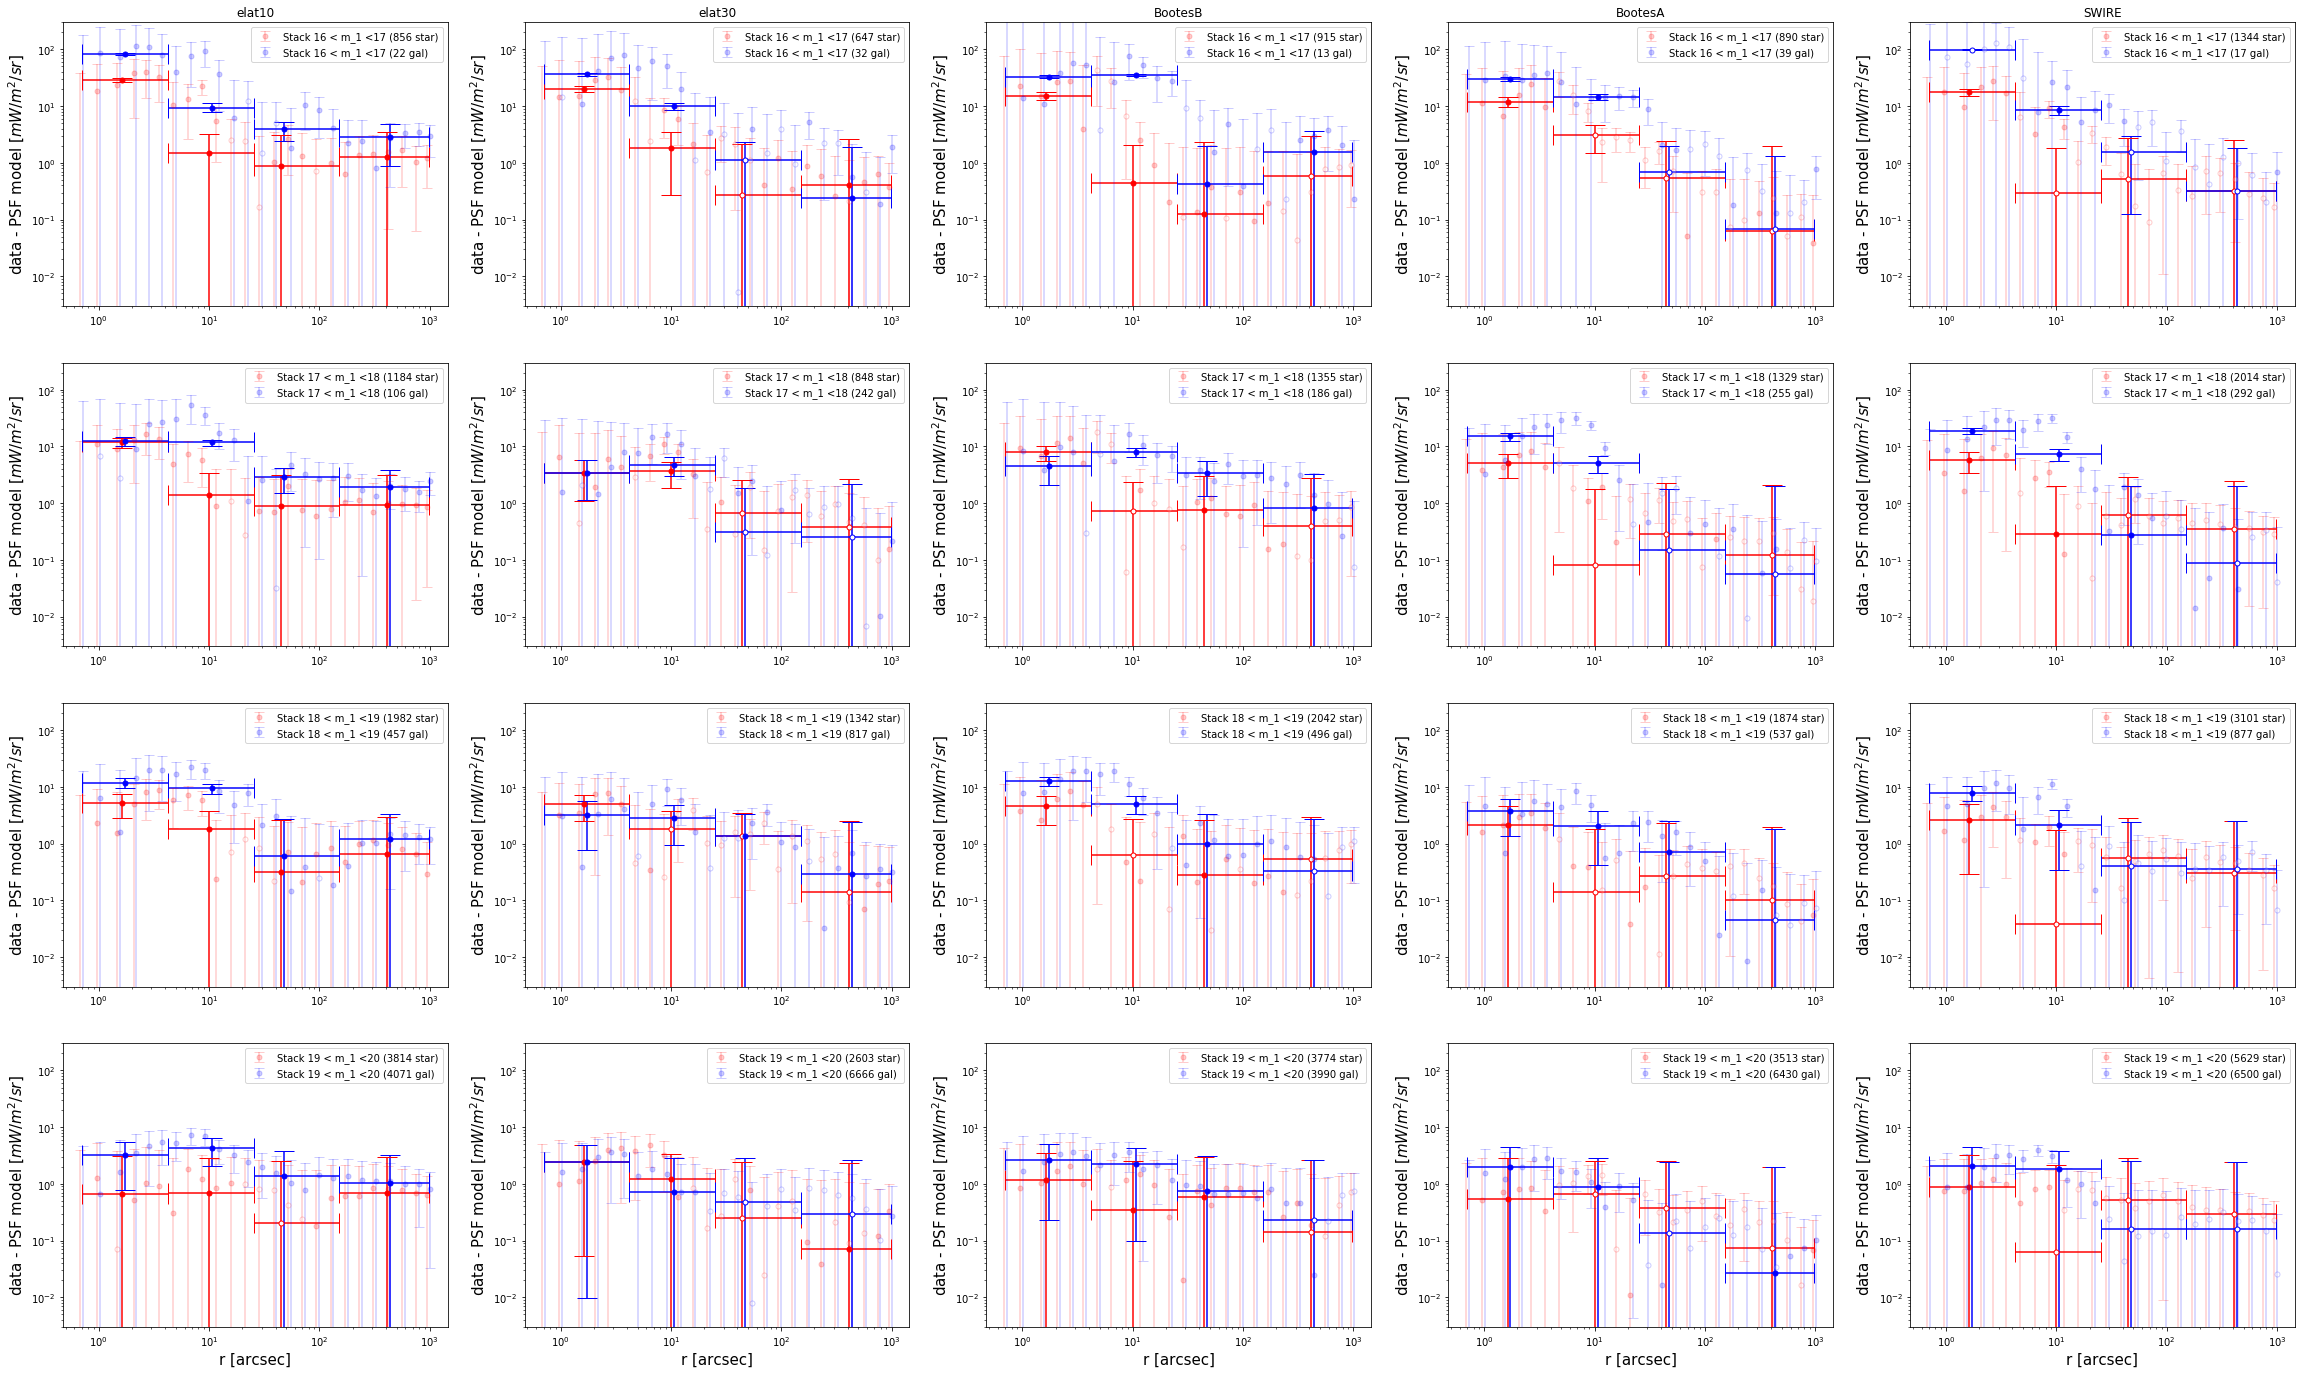

In [8]:
from stack import *
inst = 1
filt_order = filt_order_dict[inst]
fig, ax = plt.subplots(4, 5, figsize = (40,24))

binned_data = {}
for i, ifield in enumerate([4,5,6,7,8]):
    binned_data[ifield] = {}
    fname = mypaths['alldat'] + 'TM'+ str(inst) + \
    '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        binned_data[ifield][im] = {}
        for srctype,color,xoff in zip(['star','gal'],['r','b'],[0.97,1.03]):
            binned_data[ifield][im][srctype] = {}
            if srctype == 'star':
                d = profdat[im]['profcb'] - psfmodel[ifield]*profdat[im]['profcb'][0]
                s = np.diag(profdat[im]['cov'])
                cov = profdat[im]['cov']
                cov_norm = cov / (s.reshape(cov.shape[0],1)@s.reshape(1,cov.shape[0]))
                Nsrc = profdat[im]['Nsrc']
            else:
                stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                            load_from_file=True, BGsub=False).stackdat
                d = stackdat['profcb'] - psfmodel[ifield]*stackdat['profcb'][0]
                s = np.diag(stackdat['cov']['profcb'])
                cov = stackdat['cov']['profcb']
                cov_norm = cov / (s.reshape(cov.shape[0],1)@s.reshape(1,cov.shape[0]))
                Nsrc = stackdat['Nsrc']

            plot_err_log(profdat['rbins']*xoff, 
                         d,
                         np.sqrt(s),plot_xerr=False,
                         ax=ax[im][i], color=color, alpha=0.2,
                         label=r'Stack %d < m_1 <%d (%d %s)'%(m_min, m_max, Nsrc, srctype))

            m1 = np.sum(d[:6]/s[:6]) / np.sum(1/s[:6])
            e1 = np.sqrt(np.sum(cov_norm[:6,:6]) / np.sum(1/s[:6]))
            r1 = 10**np.mean(np.log10(profdat['rbins'][:6]))
            m2 = np.sum(d[6:12]/s[6:12]) / np.sum(1/s[6:12])
            e2 = np.sqrt(np.sum(cov_norm[6:12,6:12]) / np.sum(1/s[6:12]))
            r2 = 10**np.mean(np.log10(profdat['rbins'][6:12])) 
            m3 = np.sum(d[12:18]/s[12:18]) / np.sum(1/s[12:18])
            e3 = np.sqrt(np.sum(cov_norm[12:18,12:18]) / np.sum(1/s[12:18]))
            r3 = 10**np.mean(np.log10(profdat['rbins'][10:18]))
            m4 = np.sum(d[18:]/s[18:]) / np.sum(1/s[18:])
            e4 = np.sqrt(np.sum(cov_norm[18:,18:]) / np.sum(1/s[18:]))
            r4 = 10**np.mean(np.log10(profdat['rbins'][18:]))
            redges = [profdat['rbins'][0],
                      np.sqrt(profdat['rbins'][5]*profdat['rbins'][6]),
                      np.sqrt(profdat['rbins'][11]*profdat['rbins'][12]),
                      np.sqrt(profdat['rbins'][17]*profdat['rbins'][18]),
                      profdat['rbins'][-1]]
            plot_err_log(np.array([r1, r2, r3, r4])*xoff,
                         np.array([m1, m2, m3, m4]),
                         np.array([e1, e2, e3, e4]),
                         xedges = redges,capsize=10,
                         ax=ax[im][i], color=color)
            
            
            binned_data[ifield][im][srctype]['r'] = np.array([r1,r2,r3,r4])
            binned_data[ifield][im][srctype]['redges'] = redges
            binned_data[ifield][im][srctype]['m'] = np.array([m1, m2, m3, m4])
            binned_data[ifield][im][srctype]['e'] = np.array([e1, e2, e3, e4])
                
                
            ax[im][i].set_ylim([3e-3, 3e2])
            ax[im][i].grid()
            ax[im][i].legend()
            ax[im][i].set_ylabel(r'data - PSF model [$mW/m^2/sr$]',fontsize=15)
#         ax[im][i].loglog(np.array([r1, r2, r3]), mgal - mstar, 'ko', label='gal - star')
#         ax[im][i].loglog(np.array([r1, r2, r3]), -(mgal - mstar), 'ko', fillstyle='none')
    ax[0][i].set_title(fieldnamedict[ifield])
    ax[-1][i].set_xlabel('r [arcsec]',fontsize=15)
    
    plt.savefig('/Users/ytcheng/Desktop/excess.png', dpi = 100, bbox_inches='tight')

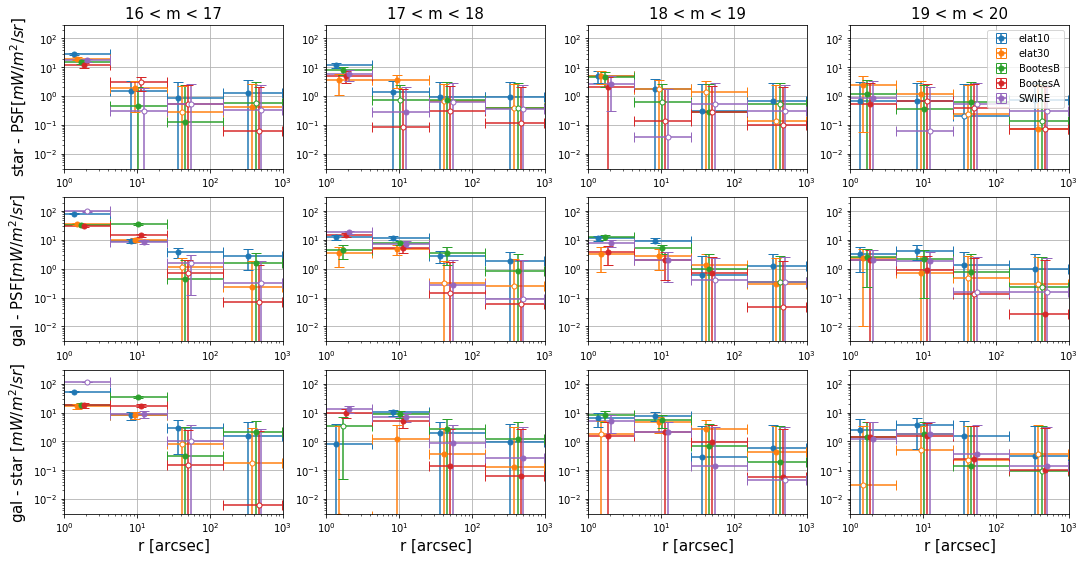

In [9]:
from run_fit import *

inst = 1
filt_order = filt_order_dict[inst]
fig, ax = plt.subplots(3, 4, figsize = (18,9))
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    for i,ifield in enumerate([4,5,6,7,8]):

        plot_err_log(binned_data[ifield][im]['star']['r']*(0.80+i*0.1),
                     binned_data[ifield][im]['star']['m'],
                     binned_data[ifield][im]['star']['e'],
                     xedges = binned_data[ifield][im]['gal']['redges'],
                     ax=ax[0][im], color='C'+str(i),label=fieldnamedict[ifield])

        plot_err_log(binned_data[ifield][im]['star']['r']*(0.80+i*0.1),
                     binned_data[ifield][im]['gal']['m'],
                     binned_data[ifield][im]['gal']['e'],
                     xedges = binned_data[ifield][im]['gal']['redges'],
                     ax=ax[1][im], color='C'+str(i),label=fieldnamedict[ifield])

        plot_err_log(binned_data[ifield][im]['star']['r']*(0.8+i*0.1),
                     binned_data[ifield][im]['gal']['m'] - binned_data[ifield][im]['star']['m'],
                     np.sqrt(binned_data[ifield][im]['gal']['e']**2 \
                          + binned_data[ifield][im]['star']['e']**2),
                     xedges = binned_data[ifield][im]['gal']['redges'],
                     ax=ax[2][im], color='C'+str(i),label=fieldnamedict[ifield])

    ax[0][im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
    ax[0][im].set_ylim([3e-3, 3e2])
    ax[0][im].set_xlim([1e0,1e3])
    ax[0][im].grid()
    ax[1][im].set_ylim([3e-3, 3e2])
    ax[1][im].set_xlim([1e0,1e3])
    ax[1][im].grid()
    ax[2][im].set_xlabel('r [arcsec]',fontsize=15)
    ax[2][im].set_ylim([3e-3, 3e2])
    ax[2][im].set_xlim([1e0,1e3])
    ax[2][im].grid()


ax[0][-1].legend(loc=1)
ax[0][0].set_ylabel(r'star - PSF[$mW/m^2/sr$]',fontsize=15)
ax[1][0].set_ylabel(r'gal - PSF[$mW/m^2/sr$]',fontsize=15)
ax[2][0].set_ylabel(r'gal - star [$mW/m^2/sr$]',fontsize=15)
plt.savefig('/Users/ytcheng/Desktop/excess1.png', dpi = 100, bbox_inches='tight')

# Check linearization

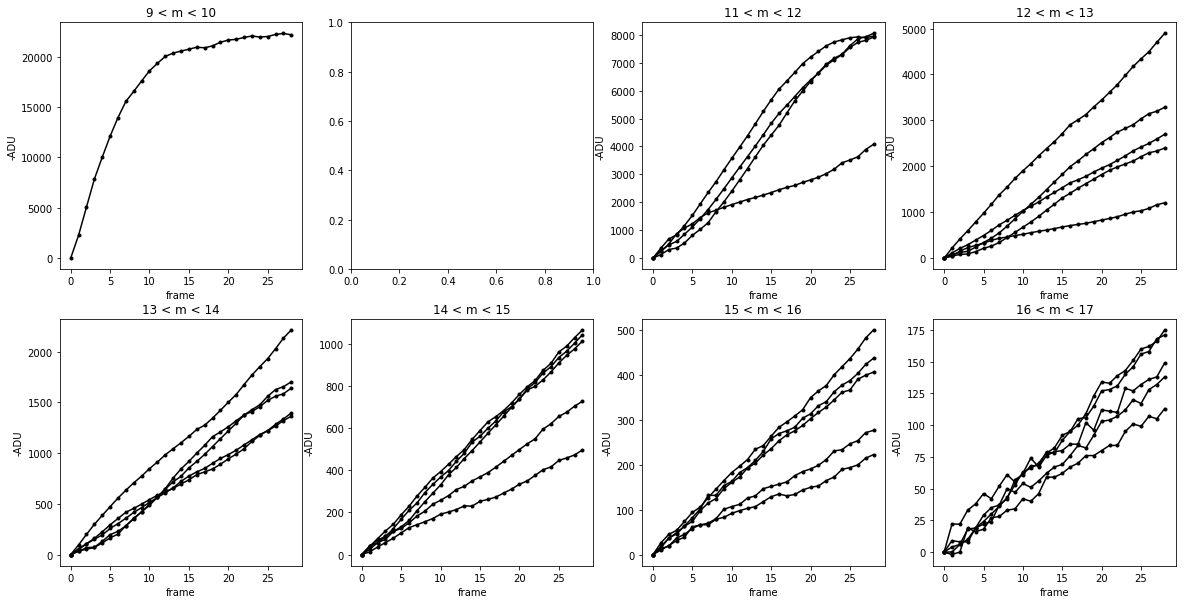

In [20]:
from reduction import *


# data_maps = {1: image_reduction(1), 2: image_reduction(2)}

inst = 1
ifield = 7

mapin, strmask, strnum, mask_inst1, mask_inst2 = \
load_processed_images(data_maps, return_names=[(inst,ifield,'cbmap'), 
                                   (inst,ifield,'strmask'), 
                                   (inst,ifield,'strnum'),
                                   (1,ifield,'mask_inst'),
                                   (2,ifield,'mask_inst')])

frames = get_frame_data().get_frames(inst, ifield)
if ifield == 5:
    frames = frames[-10:,...]

fig, ax = plt.subplots(2,4,figsize=(20,10))
for im,m_min in enumerate([9,10,11,12,13,14,15,16]):
    m_max = m_min + 1
    srcdat = ps_src_select(inst, ifield, m_min, m_max, 
        [mask_inst1, mask_inst2], sample_type='all')
    if srcdat['Ns'] == 0:
        continue
    count = 0
    for idx in range(srcdat['Ns']):
        if count >= 5:
            break
        x0, y0 = np.round(srcdat['xs_arr'][idx]).astype(int),\
        np.round(srcdat['ys_arr'][idx]).astype(int)
        
        if (x0 < 5) or (y0 < 5) or (x0 > 1018) or (y0 > 1018):
            continue
        
        mapi = mapin[x0-5:x0+5,y0-5:y0+5]
        if np.where(mapi==np.max(mapi)) == (np.array([5]),np.array([5])):
            ax[im//4][im%4].plot(-frames[:,x0, y0] + frames[0,x0, y0], 'k.-')
            count += 1
            
    ax[im//4][im%4].set_title('%d < m < %d'%(m_min, m_max))
    ax[im//4][im%4].set_xlabel('frame')
    ax[im//4][im%4].set_ylabel('-ADU')
plt.savefig('/Users/ytcheng/Desktop/linearize.png', dpi = 100, bbox_inches='tight')